### Importación de datos



In [122]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [88]:
def formatear_moneda(monto):
    # Simula formato de moneda: 123,456.78
    return f"{monto:,.2f}"

def formatear_porcentaje(monto):
    # Simula formato de porcentaje: 56.23%
    return f"{monto:.1%}"

total_tiendas = sum(tienda.Precio) + sum(tienda2.Precio) + sum(tienda3.Precio) + sum(tienda4.Precio)

#suma la columna precio para cada tienda
ingreso_total_tienda1= formatear_moneda(sum(tienda.Precio))
ingreso_total_tienda2= formatear_moneda(sum(tienda2.Precio))
ingreso_total_tienda3= formatear_moneda(sum(tienda3.Precio))
ingreso_total_tienda4= formatear_moneda(sum(tienda4.Precio))

#muestra en pantalla el total de ingresos por tienda y su porcentaje de participación que se calcula sobre el total de la venta de todas las tiendas.
print(f"\033[31m>\033[0m El ingreso de la \033[32m[Tienda1]\033[0m es: {ingreso_total_tienda1:} y su % de participación es: {formatear_porcentaje(sum(tienda.Precio)/total_tiendas)}")
print(f"\033[31m>\033[0m El ingreso de la \033[32m[Tienda2]\033[0m es: {ingreso_total_tienda2:} y su % de participación es: {formatear_porcentaje(sum(tienda2.Precio)/total_tiendas)}")
print(f"\033[31m>\033[0m El ingreso de la \033[32m[Tienda3]\033[0m es: {ingreso_total_tienda3:} y su % de participación es: {formatear_porcentaje(sum(tienda3.Precio)/total_tiendas)}")
print(f"\033[31m>\033[0m El ingreso de la \033[32m[Tienda4]\033[0m es: {ingreso_total_tienda4:} y su % de participación es: {formatear_porcentaje(sum(tienda4.Precio)/total_tiendas)}")
print("-------------------------------------------------------------------------------------\n")

print(f"Total general de ingresos {formatear_moneda(total_tiendas)}")


> El ingreso de la [Tienda1] es: 1,150,880,400.00 y su % de participación es: 26.1%
> El ingreso de la [Tienda2] es: 1,116,343,500.00 y su % de participación es: 25.4%
> El ingreso de la [Tienda3] es: 1,098,019,600.00 y su % de participación es: 24.9%
> El ingreso de la [Tienda4] es: 1,038,375,700.00 y su % de participación es: 23.6%
-------------------------------------------------------------------------------------

Total general de ingresos 4,403,619,200.00


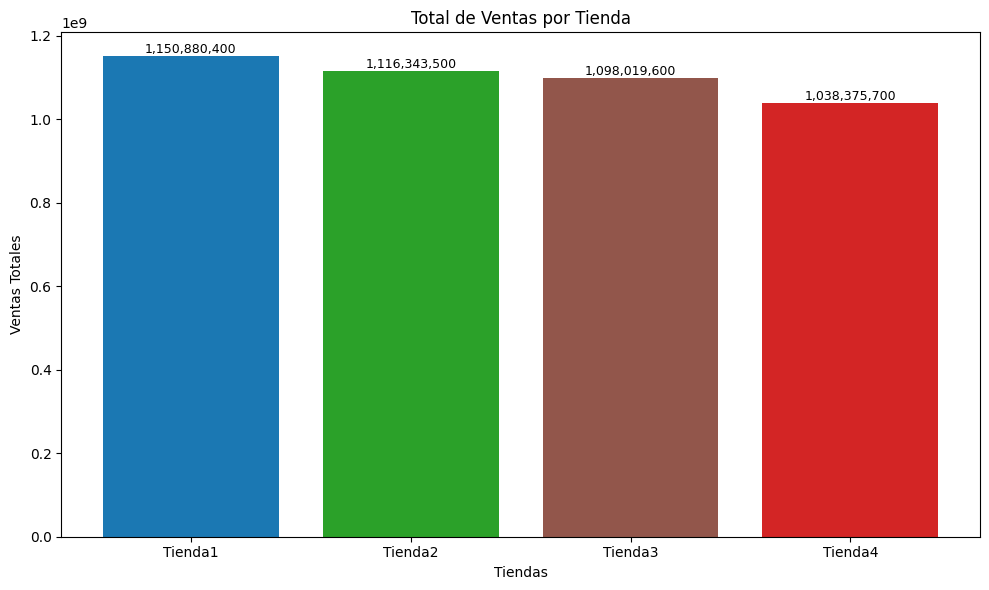

In [116]:
#GRAFICA BARRAS
import matplotlib.pyplot as plt

colores = ['#1B78B3', '#2BA129', '#92564B', '#D32525', '#9866C3', '#FE7C0B', '#7E7E7E', '#EB74C3']

tienda['tienda']="Tienda1"
tienda2['tienda']="Tienda2"
tienda3['tienda']="Tienda3"
tienda4['tienda']="Tienda4"

tiendas_juan=pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
ventas_por_tienda=tiendas_juan.groupby('tienda')['Precio'].sum().reset_index()
ventas_por_tienda=ventas_por_tienda.sort_values(by='Precio', ascending=False)
ventas_por_tienda.columns = ["tienda", "Precio"]

plt.figure(figsize=(10, 6))
bars= plt.bar(ventas_por_tienda.tienda, ventas_por_tienda.Precio, color=colores[:len(ventas_por_tienda)])

for bar in bars:
    y_val = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        y_val,
        f"{y_val:,.0f}",
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

plt.title("Total de Ventas por Tienda")
plt.xlabel("Tiendas")
plt.ylabel("Ventas Totales")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [ ]:
#PENDIENTE: ORDENAR POR LA CATEGORIA QUE VENDE MAS.

#ANALISIS DE CATEGORIAS Y PRODUCTOS EN TIENDA1
cate = []
cate = tienda.groupby('Categoría del Producto').agg({'Producto':'count','Precio':'sum' }).reset_index()
total_tienda = cate['Precio'].sum()
cate.columns = ["Categoria", "Cantidad productos", "Total ingresos"]
cate['Porcentaje'] = cate['Total ingresos'] / total_tienda
cate = cate.sort_values(by='Total ingresos', ascending=False)
cate['Total ingresos'] = cate['Total ingresos'].apply(lambda x: f"{x:,.0f}")
cate['Porcentaje'] = cate['Porcentaje'].apply(lambda x: f"{x*100:.1f}%")
print(f"\033[31m>\033[0m ANALISIS DE CATEGORIAS Y PRODUCTOS EN \033[32m[Tienda1]\033[0m")
print(cate)
print("-------------------------------------------------------------------------------------\n")
print(f"\033[31m>\033[0m Total ingresos: {total_tienda:,.0f} ")
print("\n")
#ANALISIS DE CATEGORIAS Y PRODUCTOS EN TIENDA2
cate = []
cate = tienda2.groupby('Categoría del Producto').agg({'Producto':'count','Precio':'sum'}).reset_index()
total_tienda = cate['Precio'].sum()
cate.columns = ["Categoria", "Cantidad productos", "Total ingresos"]
cate['Porcentaje'] = cate['Total ingresos'] / total_tienda
cate = cate.sort_values(by='Total ingresos', ascending=False)
cate['Total ingresos'] = cate['Total ingresos'].apply(lambda x: f"{x:,.0f}")
cate['Porcentaje'] = cate['Porcentaje'].apply(lambda x: f"{x*100:.1f}%")
print(f"\033[31m>\033[0m ANALISIS DE CATEGORIAS Y PRODUCTOS EN \033[32m[Tienda2]\033[0m")
print(cate)
print("-------------------------------------------------------------------------------------\n")
print(f"\033[31m>\033[0m Total ingresos: {total_tienda:,.0f} ")
print("\n")
#ANALISIS DE CATEGORIAS Y PRODUCTOS EN TIENDA3
cate = []
cate = tienda3.groupby('Categoría del Producto').agg({'Producto':'count','Precio':'sum'}).reset_index()
total_tienda = cate['Precio'].sum()
cate.columns = ["Categoria", "Cantidad productos", "Total ingresos"]
cate['Porcentaje'] = cate['Total ingresos'] / total_tienda
cate = cate.sort_values(by='Total ingresos', ascending=False)
cate['Total ingresos'] = cate['Total ingresos'].apply(lambda x: f"{x:,.0f}")
cate['Porcentaje'] = cate['Porcentaje'].apply(lambda x: f"{x*100:.1f}%")
print(f"\033[31m>\033[0m ANALISIS DE CATEGORIAS Y PRODUCTOS EN \033[32m[Tienda3]\033[0m")
print(cate)
print("-------------------------------------------------------------------------------------\n")
print(f"\033[31m>\033[0m Total ingresos: {total_tienda:,.0f} ")
print("\n")
#ANALISIS DE CATEGORIAS Y PRODUCTOS EN TIENDA4
cate = []
cate = tienda4.groupby('Categoría del Producto').agg({'Producto':'count','Precio':'sum'}).reset_index()
total_tienda = cate['Precio'].sum()
cate.columns = ["Categoria", "Cantidad productos", "Total ingresos"]
cate['Porcentaje'] = cate['Total ingresos'] / total_tienda
cate = cate.sort_values(by='Total ingresos', ascending=False)
cate['Total ingresos'] = cate['Total ingresos'].apply(lambda x: f"{x:,.0f}")
cate['Porcentaje'] = cate['Porcentaje'].apply(lambda x: f"{x*100:.1f}%")
print(f"\033[31m>\033[0m ANALISIS DE CATEGORIAS Y PRODUCTOS EN \033[32m[Tienda4]\033[0m")
print(cate)
print("-------------------------------------------------------------------------------------\n")
print(f"\033[31m>\033[0m Total ingresos: {total_tienda:,.0f} ")


> ANALISIS DE CATEGORIAS Y PRODUCTOS EN [Tienda1]
                 Categoria  Cantidad productos Total ingresos Porcentaje
3             Electrónicos                 448    429,493,500      37.3%
2        Electrodomésticos                 312    363,685,200      31.6%
7                  Muebles                 465    187,633,700      16.3%
4   Instrumentos musicales                 182     91,299,000       7.9%
1     Deportes y diversión                 284     39,290,000       3.4%
5                 Juguetes                 324     17,995,700       1.6%
0  Artículos para el hogar                 171     12,698,400       1.1%
6                   Libros                 173      8,784,900       0.8%
-------------------------------------------------------------------------------------

> Total ingresos: 1,150,880,400 


> ANALISIS DE CATEGORIAS Y PRODUCTOS EN [Tienda2]
                 Categoria  Cantidad productos Total ingresos Porcentaje
3             Electrónicos                 422  

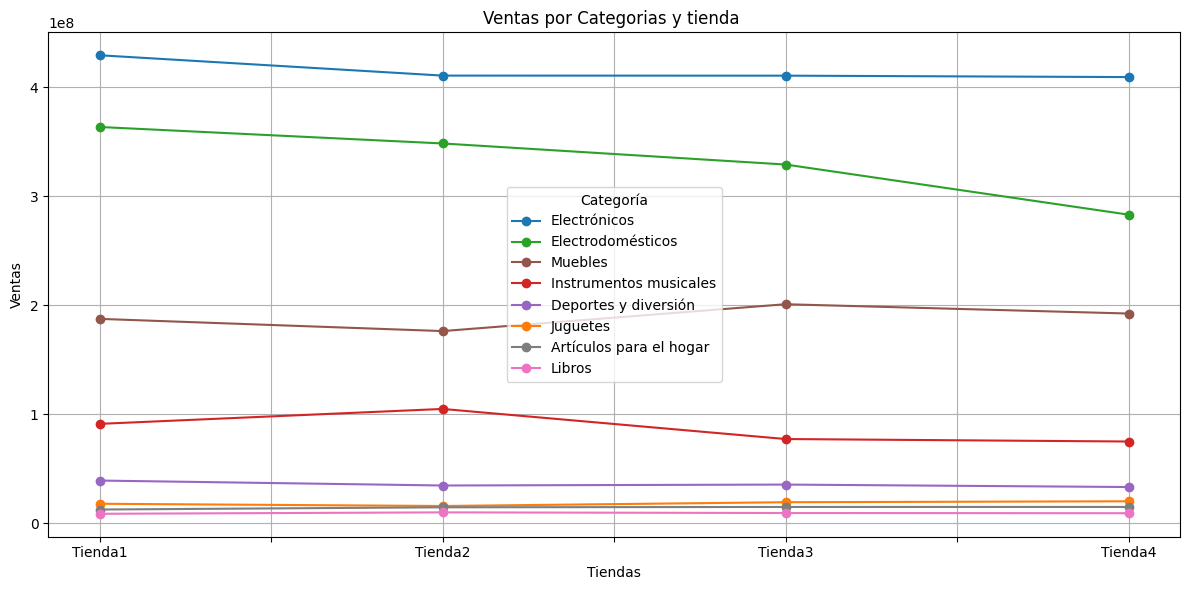

In [83]:
#GRAFICA
import matplotlib.pyplot as plt

colores = ['#1B78B3', '#2BA129', '#92564B', '#D32525', '#9866C3', '#FE7C0B', '#7E7E7E', '#EB74C3']

tienda['tienda']="Tienda1"
tienda2['tienda']="Tienda2"
tienda3['tienda']="Tienda3"
tienda4['tienda']="Tienda4"

tiendas_juan=pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
ventas_por_tienda=tiendas_juan.groupby(['Categoría del Producto', 'tienda']).agg({'Precio':'sum'}).reset_index()
ventas_por_tienda.columns = ["Categoría del Producto","tienda","Precio"]
ventas_por_tienda=ventas_por_tienda.sort_values(by=['tienda','Precio'], ascending=[True,True])
orden_metodos = ventas_por_tienda.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False).index.tolist()
df_pivot = ventas_por_tienda.pivot(index='tienda', columns='Categoría del Producto', values='Precio')
df_pivot = df_pivot[orden_metodos]
df_pivot.plot(kind='line', marker='o', figsize=(12, 6), color=colores)
plt.title("Ventas por Categorias y tienda ")
plt.xlabel("Tiendas")
plt.ylabel("Ventas")
plt.xticks(rotation=0)
plt.legend(title="Categoría")
plt.grid(True)
plt.tight_layout()
plt.show()



# 3. Calificación promedio de la tienda


In [ ]:
def promedios_tienda(tienda_valor):
#ANALISIS DE CALIFICACIONES POR TIENDA
  pro_medio = tienda_valor.Calificación.mean()
  return  f"{pro_medio:,.2f}"

def promedios_cate(tienda_valor):
#ANALISIS DE CALIFICACIONES POR CATEGORIA POR TIENDA
  cate = []
  cate = tienda_valor.groupby('Categoría del Producto').agg({'Calificación':'mean' }).reset_index()
  cate['Calificación'] = cate['Calificación'].apply(lambda x: f"{x:,.2f}")
  #print("\n")
  print(f"\033[31m>\033[0m Promedio de satisfación del cliente por categoria")
  print(cate)
  print("-------------------------------------------------------------------------------------\n")
  #print("\n")



#ANALISIS DE CALIFICACIONES POR CATEGORIAS POR TIENDA1
resultado = promedios_tienda(tienda)
print(f"\033[31m>\033[0m El promedio general de las calificaciones de satisfacción del cliente para \033[32m[Tienda1]\033[0m es: {resultado} ")
promedios_cate(tienda)
#ANALISIS DE CALIFICACIONES POR CATEGORIAS POR TIENDA2
resultado = promedios_tienda(tienda2)
print(f"\033[31m>\033[0m El promedio general de las calificaciones de satisfacción del cliente para  \033[32m[Tienda2]\033[0m es: {resultado} ")
promedios_cate(tienda2)
#ANALISIS DE CALIFICACIONES POR CATEGORIAS POR TIENDA3
resultado = promedios_tienda(tienda3)
print(f"\033[31m>\033[0m El promedio general de las calificaciones de satisfacción del cliente para  \033[32m[Tienda3]\033[0m es: {resultado} ")
promedios_cate(tienda3)
#ANALISIS DE CALIFICACIONES POR CATEGORIAS POR TIENDA4
resultado = promedios_tienda(tienda4)
print(f"\033[31m>\033[0m El promedio general de las calificaciones de satisfacción del cliente para  \033[32m[Tienda4]\033[0m es: {resultado} ")
promedios_cate(tienda4)





> El promedio general de las calificaciones de satisfacción del cliente para [Tienda1] es: 3.98 
> Promedio de satisfación del cliente por categoria
    Categoría del Producto Calificación
0  Artículos para el hogar         3.75
1     Deportes y diversión         3.90
2        Electrodomésticos         4.03
3             Electrónicos         4.00
4   Instrumentos musicales         4.05
5                 Juguetes         4.08
6                   Libros         3.98
7                  Muebles         3.95
-------------------------------------------------------------------------------------

> El promedio general de las calificaciones de satisfacción del cliente para  [Tienda2] es: 4.04 
> Promedio de satisfación del cliente por categoria
    Categoría del Producto Calificación
0  Artículos para el hogar         4.07
1     Deportes y diversión         4.07
2        Electrodomésticos         4.07
3             Electrónicos         3.97
4   Instrumentos musicales         4.04
5             

# 4. Productos más y menos vendidos



In [ ]:
def ventas_producto_max(tienda_valor):
  #ANALISIS DE PRODUCTOS MAS VENDIDOS POR TIENDA
  productos_max = tienda_valor.groupby('Producto')['Precio'].sum().reset_index()
  productos_max = productos_max.sort_values(by='Precio', ascending=False)
  productos_max['Precio'] = productos_max['Precio'].apply(lambda x: f"{x:,.0f}")
  return productos_max.head()

def ventas_producto_min(tienda_valor):
  #ANALISIS DE PRODUCTOS MENOS VENDIDOS POR TIENDA
  productos_max = tienda_valor.groupby('Producto')['Precio'].sum().reset_index()
  productos_max = productos_max.sort_values(by='Precio', ascending=True)
  productos_max['Precio'] = productos_max['Precio'].apply(lambda x: f"{x:,.0f}")
  return productos_max.head()

#ANALISIS DE PRODUCTOS MAS VENDIDOS Y MENOS VENDIDOS PARA TIENDA1
print(f"\033[31m>\033[0m Productos mas vendidos y menos vendidos de \033[32m[Tienda1]\033[0m \n")
print(f"\033[31m>\033[0m TOP5 de los productos mas vendidos \n{ventas_producto_max(tienda)} \n")
print(f"\033[31m>\033[0m TOP5 de los productos menos vendidos \n{ventas_producto_min(tienda)}")
print("-------------------------------------------------------------------------------------\n")
#ANALISIS DE PRODUCTOS MAS VENDIDOS Y MENOS VENDIDOS PARA TIENDA2
print(f"\033[31m>\033[0m Productos mas vendidos y menos vendidos de \033[32m[Tienda2]\033[0m \n")
print(f"\033[31m>\033[0m TOP5 de los productos mas vendidos \n{ventas_producto_max(tienda2)} \n")
print(f"\033[31m>\033[0m TOP5 de los productos menos vendidos \n{ventas_producto_min(tienda2)}")
print("-------------------------------------------------------------------------------------\n")
#ANALISIS DE PRODUCTOS MAS VENDIDOS Y MENOS VENDIDOS PARA TIENDA3
print(f"\033[31m>\033[0m Productos mas vendidos y menos vendidos de \033[32m[Tienda3]\033[0m \n")
print(f"\033[31m>\033[0m TOP5 de los productos mas vendidos \n{ventas_producto_max(tienda3)} \n")
print(f"\033[31m>\033[0m TOP5 de los productos menos vendidos \n{ventas_producto_min(tienda3)}")
print("-------------------------------------------------------------------------------------\n")
#ANALISIS DE PRODUCTOS MAS VENDIDOS Y MENOS VENDIDOS PARA TIENDA4
print(f"\033[31m>\033[0m Productos mas vendidos y menos vendidos de \033[32m[Tienda4]\033[0m \n")
print(f"\033[31m>\033[0m TOP5 de los productos mas vendidos \n{ventas_producto_max(tienda4)} \n")
print(f"\033[31m>\033[0m TOP5 de los productos menos vendidos \n{ventas_producto_min(tienda4)}")
print("-------------------------------------------------------------------------------------\n")

> Productos mas vendidos y menos vendidos de [Tienda1] 

> TOP5 de los productos mas vendidos 
            Producto       Precio
48     TV LED UHD 4K  142,150,200
39      Refrigerador  112,143,300
25         Iphone 15   97,902,200
45          Smart TV   67,452,100
28  Lavadora de ropa   65,783,600 

> TOP5 de los productos menos vendidos 
              Producto     Precio
17  Cuerda para saltar    652,800
19      Dinosaurio Rex    688,900
16     Cubo mágico 8x8    696,900
42        Set de vasos  1,359,100
0    Ajedrez de madera  1,430,600
-------------------------------------------------------------------------------------

> Productos mas vendidos y menos vendidos de [Tienda2] 

> TOP5 de los productos mas vendidos 
            Producto       Precio
25         Iphone 15  113,225,800
48     TV LED UHD 4K  103,375,000
39      Refrigerador   97,632,500
28  Lavadora de ropa   66,762,300
45          Smart TV   61,142,000 

> TOP5 de los productos menos vendidos 
              Producto     

# 5. Envío promedio por tienda

In [ ]:
def costoEnvio_tienda(tienda_valor):
#PROMEDIO DE COSTO DE ENVIO POR TIENDA
  pro_medio = tienda_valor['Costo de envío'].mean()
  return  f"{pro_medio:,.2f}"

def promedioEnvio_cate(tienda_valor):
#ANALISIS DE CALIFICACIONES POR CATEGORIA POR TIENDA
  cate = []
  cate = tienda_valor.groupby('Categoría del Producto').agg({'Costo de envío':'mean' }).reset_index()
  cate = cate.sort_values(by='Costo de envío', ascending=False)
  cate['Costo de envío'] = cate['Costo de envío'].apply(lambda x: f"{x:,.2f}")
  #print("\n")
  print(f"\033[31m>\033[0m Promedio de costo de envío por categoria")
  print(cate)
  print("-------------------------------------------------------------------------------------\n")
  #print("\n")

#PROMEDIO DE COSTO DE ENVIO POR TIENDA1
resultado = costoEnvio_tienda(tienda)
print(f"\033[31m>\033[0m El promedio general del costo de envío para \033[32m[Tienda1]\033[0m es: {resultado} \n")
resultado = promedioEnvio_cate(tienda)
#PROMEDIO DE COSTO DE ENVIO POR TIENDA2
resultado = costoEnvio_tienda(tienda2)
print(f"\033[31m>\033[0m El promedio general del costo de envío para \033[32m[Tienda2]\033[0m es: {resultado} \n")
resultado = promedioEnvio_cate(tienda2)
#PROMEDIO DE COSTO DE ENVIO POR TIENDA3
resultado = costoEnvio_tienda(tienda3)
print(f"\033[31m>\033[0m El promedio general del costo de envío para \033[32m[Tienda3]\033[0m es: {resultado} \n")
resultado = promedioEnvio_cate(tienda3)
#PROMEDIO DE COSTO DE ENVIO POR TIENDA4
resultado = costoEnvio_tienda(tienda4)
print(f"\033[31m>\033[0m El promedio general del costo de envío para \033[32m[Tienda4]\033[0m es: {resultado} \n")
resultado = promedioEnvio_cate(tienda4)


> El promedio general del costo de envío para [Tienda1] es: 26,018.61 

> Promedio de costo de envío por categoria
    Categoría del Producto Costo de envío
2        Electrodomésticos      61,935.90
3             Electrónicos      51,258.26
4   Instrumentos musicales      26,834.62
7                  Muebles      21,494.41
1     Deportes y diversión       7,468.66
0  Artículos para el hogar       3,764.91
5                 Juguetes       3,023.15
6                   Libros       2,699.42
-------------------------------------------------------------------------------------

> El promedio general del costo de envío para [Tienda2] es: 25,216.24 

> Promedio de costo de envío por categoria
    Categoría del Producto Costo de envío
2        Electrodomésticos      60,838.03
3             Electrónicos      51,692.42
4   Instrumentos musicales      24,811.16
7                  Muebles      21,348.64
1     Deportes y diversión       6,826.55
0  Artículos para el hogar       4,424.31
5          

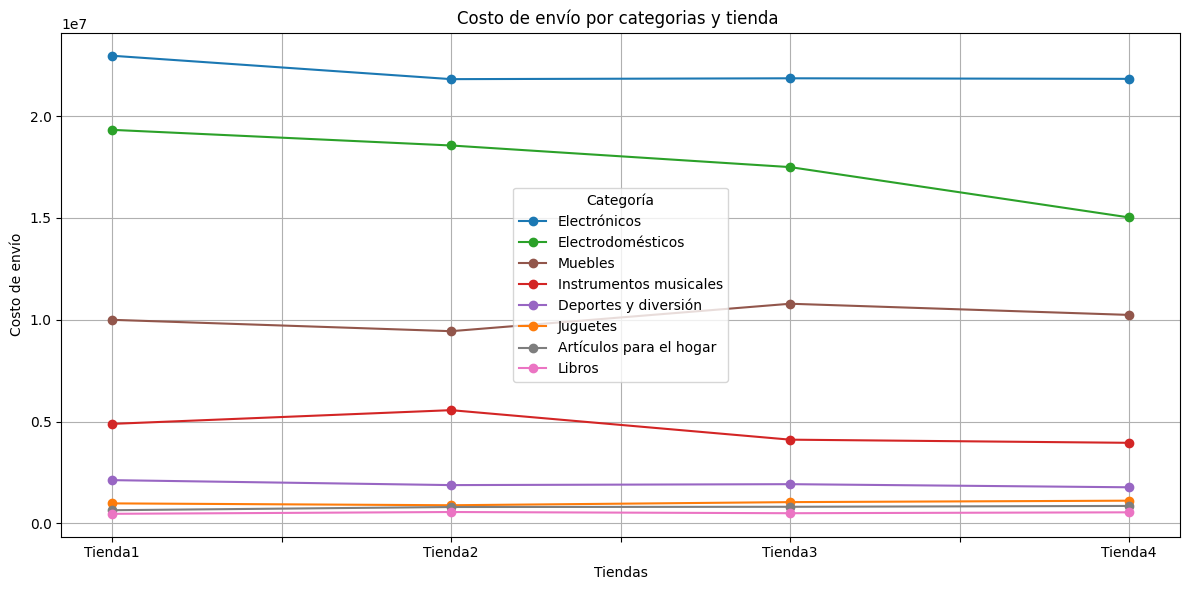

In [113]:
#GRAFICA
import matplotlib.pyplot as plt

colores = ['#1B78B3', '#2BA129', '#92564B', '#D32525', '#9866C3', '#FE7C0B', '#7E7E7E', '#EB74C3']

tienda['tienda']="Tienda1"
tienda2['tienda']="Tienda2"
tienda3['tienda']="Tienda3"
tienda4['tienda']="Tienda4"

tiendas_juan=pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
tiendas_juan = tiendas_juan.rename(columns={'Costo de envío': 'envio'})
ventas_por_tienda=tiendas_juan.groupby(['Categoría del Producto', 'tienda']).agg({'envio':'sum'}).reset_index()
ventas_por_tienda.columns = ["Categoría del Producto","tienda","envio"]
ventas_por_tienda=ventas_por_tienda.sort_values(by=['tienda','envio'], ascending=[True,True])
orden_metodos = ventas_por_tienda.groupby('Categoría del Producto')['envio'].sum().sort_values(ascending=False).index.tolist()
df_pivot = ventas_por_tienda.pivot(index='tienda', columns='Categoría del Producto', values='envio')
df_pivot = df_pivot[orden_metodos]
df_pivot.plot(kind='line', marker='o', figsize=(12, 6), color=colores)
plt.title("Costo de envío por categorias y tienda ")
plt.xlabel("Tiendas")
plt.ylabel("Costo de envío")
plt.xticks(rotation=0)
plt.legend(title="Categoría")
plt.grid(True)
plt.tight_layout()
plt.show()

# Opcional. Análisis del desempeño geográfico

In [166]:
!pip install folium

In [288]:
import folium
from IPython.display import display
tienda['tienda']="Tienda1"
tienda2['tienda']="Tienda2"
tienda3['tienda']="Tienda3"
tienda4['tienda']="Tienda4"

tiendas_juan=pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
#tiendas_juan=tienda
tiendas_juan=tiendas_juan.groupby(by=['tienda', 'lat', 'lon'])['Precio'].sum().reset_index()
tiendas_juan.columns = ["tienda", "lat", "lon", "Precio"]
print (tiendas_juan)
colores_por_tienda = {
    'Tienda1': 'red',
    'Tienda2': 'blue',
    'Tienda3': 'green',
    'Tienda4': 'purple'
}

     tienda       lat       lon       Precio
0   Tienda1  -4.21528 -69.94056   14669800.0
1   Tienda1   1.21361 -77.28111   14996400.0
2   Tienda1   2.92730 -75.28189    3494000.0
3   Tienda1   3.43722 -76.52250  154493700.0
4   Tienda1   3.86530 -67.92390    2722500.0
..      ...       ...       ...          ...
71  Tienda4  10.39972 -75.51444   24387600.0
72  Tienda4  10.46314 -73.25322    1057000.0
73  Tienda4  10.96854 -74.78132   34623000.0
74  Tienda4  11.24079 -74.19904   13218600.0
75  Tienda4  11.54444 -72.90722   23684700.0

[76 rows x 4 columns]


In [289]:
centro = [tiendas_juan['lat'].mean(), tiendas_juan['lon'].mean()]

In [290]:
mapa = folium.Map(location=centro, zoom_start=7)

In [293]:
for _, fila in tiendas_juan.iterrows():
    color = colores_por_tienda.get(fila['tienda'], 'gray')
    folium.CircleMarker(
        location=[fila['lat'], fila['lon']],
        radius=fila['Precio'] / 900000,  # Escala dinámica
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.8,
        popup=folium.Popup(f"<b>{fila['tienda']}</b><br>Ventas: Q{fila['Precio']:,.2f}<br>Lat: {fila['lat']}<br> Lon: {fila['lon']}", max_width=200),
        tooltip=f"{fila['tienda']}"
    ).add_to(mapa)

# Mostrar en notebook (Colab)
display(mapa)

In [294]:
mapa.save("ventas_mapa.html")
from google.colab import files
files.download("ventas_mapa.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>